In [ ]:
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv, ODEModel
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint 
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, LearnVelTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st, MiscTransforms
importlib.reload(ODEModel)
from ODEModel import velocMLP, FfjordModel
importlib.reload(LearnVelTraj);
from LearnVelTraj import learn_vel_trajectory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

im1 = ImageDataset('frames/butterfly.jpg'); 
im1b = ImageDataset('frames/butterflyfilled.jpg'); 
im2 = ImageDataset('frames/caterpillar.png', noise_std = .005); 
im3 = ImageDataset('frames/circle.jpeg'); 
im4 = ImageDataset('frames/baldhead.jpeg'); 
im5 = ImageDataset('frames/square.png'); 
im6 = ImageDataset('frames/cat1.png'); 

n_inner = 7000;
n_sil = 10000 - n_inner;
d2 = im2.sample(n_inner, n_sil, scale = [-1, -1], center = [0.05, -.5]); 
d1a = im1.sample(n_inner, n_sil, center = [0, 0]); 
d1b = im1b.sample(n_inner, n_sil, center = [0, 0]); 
d3 = im3.sample(n_inner, n_sil, center = [1, .5]); 
d4 = im4.sample(n_inner, n_sil, center = [1, -.5]); 
d5 = im5.sample(n_inner, n_sil, center = [1.9, .3]); 
d6 = im6.sample(n_inner, n_sil, center = [2, -.3]); 

dat1 = torch.cat((d1a[0], d1b[1]),0)
dat2 = torch.cat(d2,0)
dat3 = torch.cat(d3,0)
dat4 = torch.cat(d4,0)
dat5 = torch.cat(d5,0)
dat6 = torch.cat(d6,0)

ezshow(dat1, col='yellow')
ezshow(dat2, col='red')
ezshow(dat3, col='orange')
ezshow(dat4, col='green')
ezshow(dat5, col='blue')
ezshow(dat6, col='magenta')

In [ ]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True, initzero = True).to(device)
outfolder = "results/experiment_initzero_true/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 200, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=100)

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True, initzero = False).to(device)
outfolder = "results/experiment_initzero_false/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 200, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=100)


  0%|          | 1/300 [00:00<04:38,  1.07it/s]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.9307 | Iter: 0.9288 | fit: 0.1636 | reg: 0.1172 | save: 0.0000) | autograd: 0.6464]


 17%|█▋        | 51/300 [01:13<16:47,  4.05s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.1008 | lr: 0.0001 | n_subsample: 378] 
[Total time : 73.1305 | Iter: 63.5976 | fit: 0.2111 | reg: 0.1375 | save: 8.5986) | autograd: 1.0661]


 34%|███▎      | 101/300 [02:44<14:57,  4.51s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0338 | lr: 0.0001 | n_subsample: 476] 
[Total time : 164.7504 | Iter: 82.8708 | fit: 0.2317 | reg: 0.1761 | save: 8.7456) | autograd: 1.3259]


 50%|█████     | 151/300 [04:53<12:37,  5.08s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0321 | lr: 0.0001 | n_subsample: 600] 
[Total time : 293.0161 | Iter: 119.3900 | fit: 0.3070 | reg: 0.1675 | save: 8.8723) | autograd: 1.8464]


 67%|██████▋   | 201/300 [06:59<08:07,  4.93s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0331 | lr: 0.0001 | n_subsample: 756] 
[Total time : 419.7901 | Iter: 118.0282 | fit: 0.2766 | reg: 0.1524 | save: 8.7414) | autograd: 1.8436]


 84%|████████▎ | 251/300 [09:03<03:58,  4.87s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0206 | lr: 0.0001 | n_subsample: 953] 
[Total time : 543.3498 | Iter: 114.8276 | fit: 0.2734 | reg: 0.1700 | save: 8.7290) | autograd: 1.6347]


100%|██████████| 300/300 [10:53<00:00,  2.18s/it]


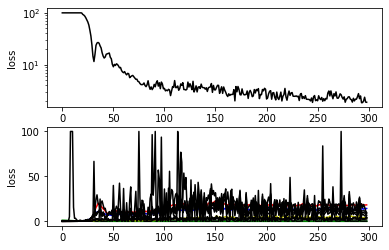

In [72]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
outfolder = "results/experiment_relweight/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=100)

In [ ]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));
sigmacs = range(2,8)
models = []
lossess = []
separate_lossess = []
separate_timess = []
for sigmaci in range(len(sigmacs)):
    sigmac = sigmacs[sigmaci]
    model = FfjordModel(sigmac = 2, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
    outfolder = "results/experiment3_sigma_" + f"{sigmac:02}/"
    model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 100, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
    st.save_losses(losses, separate_losses, outfolder=outfolder)
    models.append(model);    lossess.append(losses);    separate_lossess.append(separate_losses);    separate_timess.append(separate_times)

  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Allocated: 0.03 GB  Reserved: 0.38 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.8729 | Iter: 0.8712 | fit: 0.1615 | reg: 0.0960 | save: 0.0000) | autograd: 0.6118]


 19%|█▉        | 19/100 [00:19<01:21,  1.01s/it]


KeyboardInterrupt: 

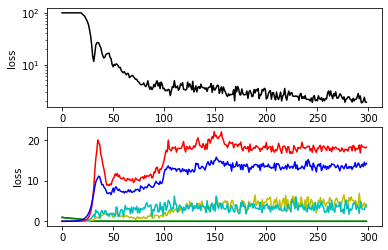

In [85]:
import Utils; importlib.reload(Utils); from Utils import SaveTrajectory as st
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=100)

In [77]:
losses.max()

141.42135620117188